In [ ]:
pip install mesa


**Define the agents:** buyer, seller agents.


For simplicity, assume that buyers have a fixed budget and a preference for a certain product, while sellers have a fixed set of products and a pricing strategy.



In [ ]:
from mesa import Agent, Model
import random

class Buyer(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.budget = random.randint(10, 100)
        self.preference = random.choice(["Product A", "Product B", "Product C"])

    def step(self):
        # Find a seller who sells the preferred product
        seller = random.choice([a for a in self.model.schedule.agents if isinstance(a, Seller) and self.preference in a.products])
        # If the buyer can afford the product, make a purchase
        if self.budget >= seller.price:
            self.budget -= seller.price
            seller.inventory -= 1
            self.model.revenue += seller.price

class Seller(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.price = random.randint(10, 100)
        self.products = ["Product A", "Product B", "Product C"]
        self.inventory = random.randint(0, 100)

    def step(self):
        if self.inventory > 0:
            self.model.sales += 1
        # In the Red Ocean Strategy, sellers lower their prices periodically to attract more buyers
        if self.model.strategy == "Red Ocean":
            if self.model.schedule.steps % 10 == 0:
                self.price -= 1
        # In the Blue Ocean Strategy, sellers focus on creating new products that are not currently available in the market
        elif self.model.strategy == "Blue Ocean":
            if self.inventory == 0:
                self.products.append("New Product")


**The model which initializes the agents and sets up the simulation parameters.**


In [ ]:
class EcommerceModel(Model):
    def __init__(self, N, strategy):
        self.num_buyers = N
        self.strategy = strategy
        self.schedule = RandomActivation(self)
        self.revenue = 0
        self.sales = 0
        # Create buyers and sellers
        for i in range(self.num_buyers):
            a = Buyer(i, self)
            self.schedule.add(a)
        for i in range(10):
            a = Seller(i + self.num_buyers, self)
            self.schedule.add(a)

    def step(self):
        self.schedule.step()


Plot the results

500
Total revenue of Red Ocean: 4248
Total sales of Red Ocean: 831
500
Total revenue of Blue Ocean: 24986
Total sales of Blue Ocean: 3502


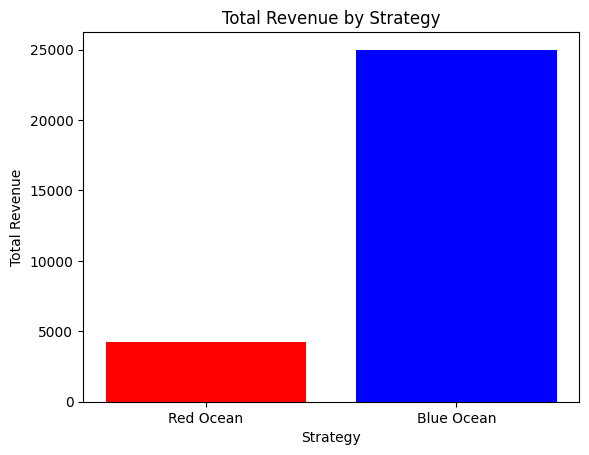

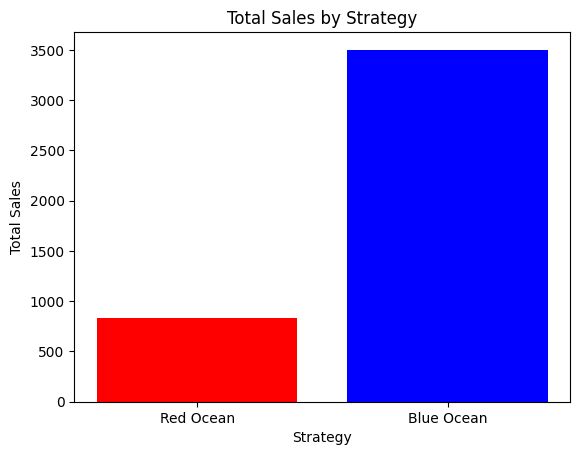

In [ ]:
from mesa.time import RandomActivation
import matplotlib.pyplot as plt
interations = 500 # 10, 40, 200, 500 (number of customers)

# Run the simulation for both Red Ocean and Blue Ocean strategies
model_red = EcommerceModel(interations, "Red Ocean")
for i in range(interations):
    model_red.step()

print("Total revenue of Red Ocean:", model_red.revenue)
print("Total sales of Red Ocean:", model_red.sales)

model_blue = EcommerceModel(interations, "Blue Ocean")
for i in range(interations):
    model_blue.step()

print("Total revenue of Blue Ocean:", model_blue.revenue)
print("Total sales of Blue Ocean:", model_blue.sales)


# Create a bar chart to compare total revenue
plt.bar(["Red Ocean", "Blue Ocean"], [model_red.revenue, model_blue.revenue],color=['red','blue'])
plt.title("Total Revenue by Strategy")
plt.xlabel("Strategy")
plt.ylabel("Total Revenue")
plt.show()

# Create a bar chart to compare total sales
plt.bar(["Red Ocean", "Blue Ocean"], [model_red.sales, model_blue.sales], color=['red','blue'])
plt.title("Total Sales by Strategy")
plt.xlabel("Strategy")
plt.ylabel("Total Sales")
plt.show()



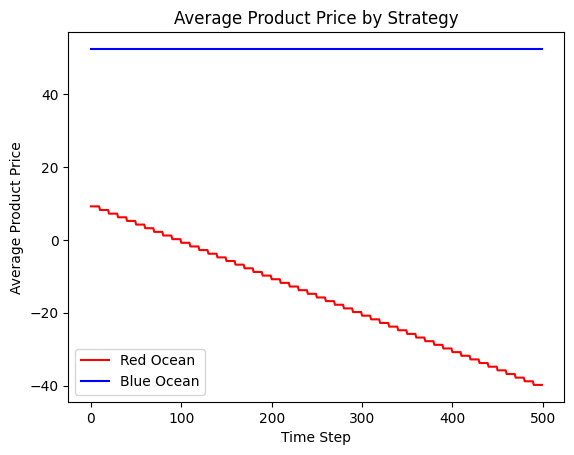

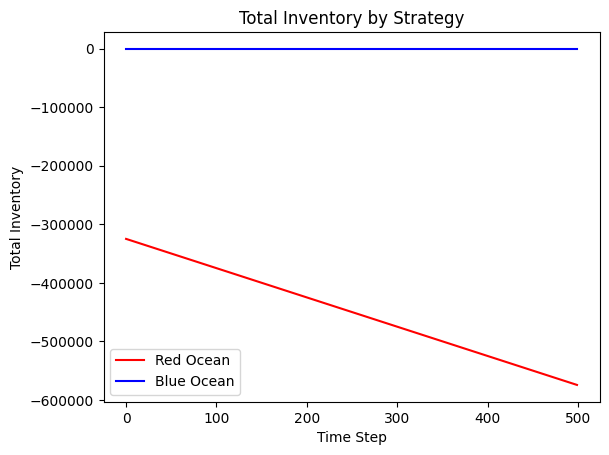

In [ ]:
# Create a line chart to track the average price of products over time for each strategy
prices_red = []
prices_blue = []
for i in range(interations):
    model_red.step()
    model_blue.step()
    prices_red.append(sum([a.price for a in model_red.schedule.agents if isinstance(a, Seller)]) / 10)
    prices_blue.append(sum([a.price for a in model_blue.schedule.agents if isinstance(a, Seller)]) / 10)

plt.plot(prices_red, color='red', label="Red Ocean")
plt.plot(prices_blue, color='blue', label="Blue Ocean")
plt.title("Average Product Price by Strategy")
plt.xlabel("Time Step")
plt.ylabel("Average Product Price")
plt.legend()
plt.show()

# Create a line chart to track the inventory levels over time for each strategy
inventory_red = []
inventory_blue = []
for i in range(interations):
    model_red.step()
    model_blue.step()
    inventory_red.append(sum([a.inventory for a in model_red.schedule.agents if isinstance(a, Seller)]))
    inventory_blue.append(sum([a.inventory for a in model_blue.schedule.agents if isinstance(a, Seller)]))

plt.plot(inventory_red, color='red', label="Red Ocean")
plt.plot(inventory_blue, color='blue', label="Blue Ocean")
plt.title("Total Inventory by Strategy")
plt.xlabel("Time Step")
plt.ylabel("Total Inventory")
plt.legend()
plt.show()


The Blue Ocean strategy was found to be more effective in generating higher revenue and sales by creating a new market space and finding uncontested market space. In contrast, the Red Ocean strategy was more effective in maintaining higher prices and inventory levels by competing in an existing market.
